# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

# Reading the dataset

In [2]:
df=pd.read_csv('health care diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
positive=df[df['Outcome']==1]

In [8]:
positive

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [9]:
columns=['BMI','Insulin','SkinThickness','BloodPressure','Glucose']

# Visualization

C:\Users\saaim\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


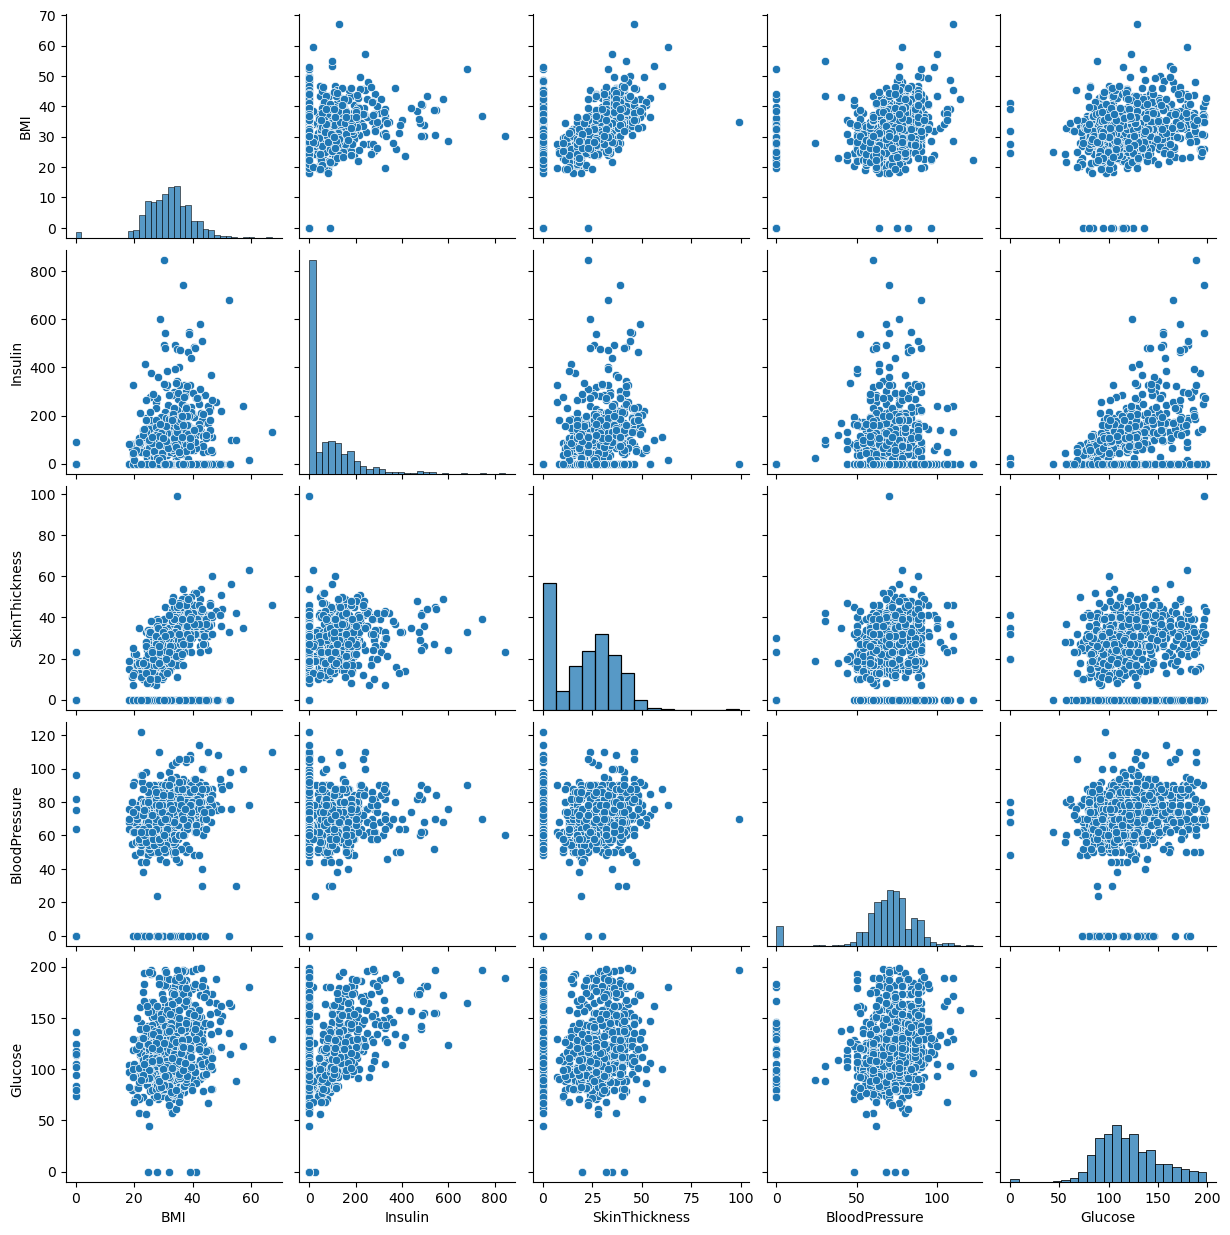

In [10]:
sns.pairplot(df[columns],diag_kind='hist')

<Axes: xlabel='Glucose', ylabel='BloodPressure'>

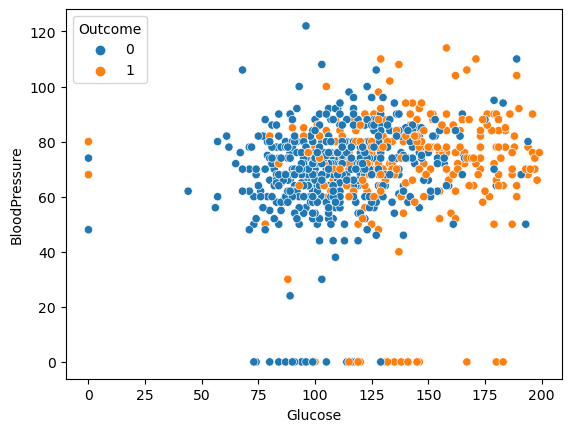

In [11]:
sns.scatterplot(data=df,x='Glucose',y='BloodPressure',hue='Outcome')

<Axes: xlabel='BMI', ylabel='Insulin'>

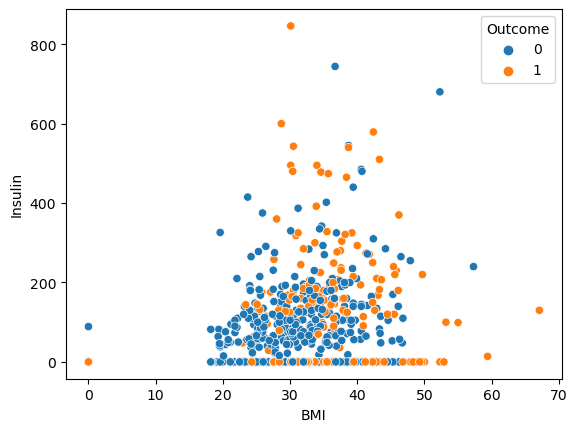

In [12]:
sns.scatterplot(df,x='BMI',y='Insulin',hue='Outcome')

<Axes: xlabel='SkinThickness', ylabel='Insulin'>

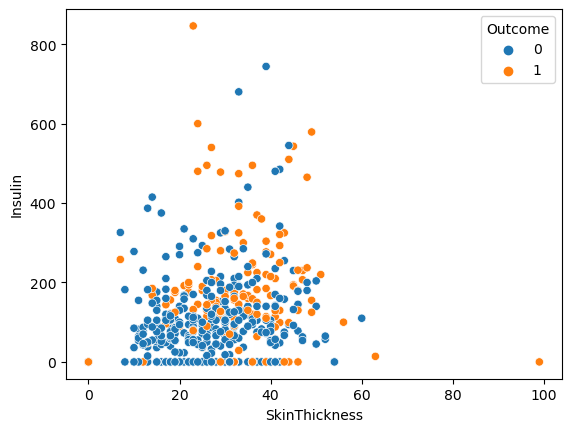

In [13]:
sns.scatterplot(df,x='SkinThickness',y='Insulin',hue='Outcome')

In [14]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

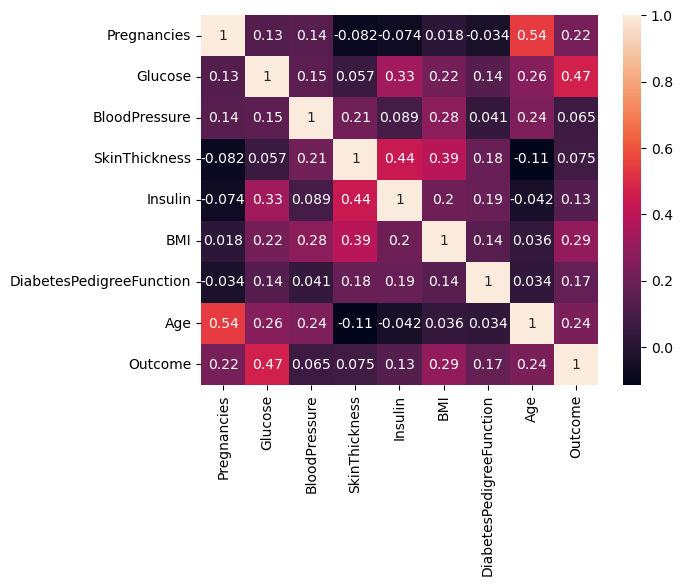

In [15]:
sns.heatmap(df.corr(),annot=True)

In [16]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
x=df.iloc[:,[0,1,2,3,4,5,6,7]].values

In [18]:
y=df.iloc[:,8].values

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

# Model Training

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [23]:

predict_lr=model.predict(x)

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print('Accuracy Score',accuracy_score(y,predict_lr))
print(confusion_matrix(y,predict_lr))

Accuracy Score 0.7708333333333334
[[446  54]
 [122 146]]


In [25]:
from sklearn.metrics import classification_report
print('Logistic Regression Report')
print('='*100)
print(classification_report(y,prediction))
print('='*100)
print('train',model.score(x_train,y_train))
print('test',model.score(x_test,y_test))

Logistic Regression Report


NameError: name 'prediction' is not defined

In [ ]:

ap=average_precision_score(y,probs_lr)
print('F1-Score`||',f1*100)
print('Average Precision||',ap*100)
print("AUC||",auc*100)
plt.plot([0,1],[0.5,0.5],linestyle='--',label='No Skill')
plt.plot(recall,precision,marker='.')
plt.title('Random Forest')
plt.show()

# Decison Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DS=DecisionTreeClassifier(max_depth=5)
DS.fit(x_train,y_train)
p_ds=DS.predict(x)
print('Accuracy',accuracy_score(y,p_ds))

In [ ]:
print('Train',DS.score(x_train,y_train))
print('Test',DS.score(x_test,y_test))

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

In [ ]:
probs=DS.predict_proba(x)
probs=probs[:,1]
f1_ds=f1_score(y,p_ds)
precision,recall,thresholds=precision_recall_curve(y,probs)
auc_d=auc(recall,precision)
ap_d=average_precision_score(y,probs)


In [ ]:
print('F1 Score||',f1_ds)
print('Area Under The Curve||',auc_d)
print('Average Precision||',ap_d)

In [ ]:
from sklearn.metrics import classification_report
print('Decision Tree Report')
print('='*100)
print(classification_report(y,p_ds))
print('='*100)

In [ ]:
probs_lr=rf.predict_proba(x)
probs_lr=probs_lr[:,1]
precision,recall,thresholds=precision_recall_curve(y,probs_lr)
f1=f1_score(y,predict_rf)
auc=roc_auc_score(y,probs_lr)

In [ ]:

ap=average_precision_score(y,probs)
print('F1-Score||',f1*100)
print('Average Precision||',ap*100)
print("AUC||",auc*100)
plt.plot([0,1],[0.5,0.5],linestyle='--',label='No Skill')
plt.plot(recall,precision,marker='.')
plt.title('Logistic Regression')
plt.show()

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=11)
rf.fit(x_train,y_train)
predict_rf=rf.predict(x)
print('Accuracy Score||',accuracy_score(y,predict_rf)*100)

In [ ]:
print('Train Score||',rf.score(x_train,y_train))
print('test Score||',rf.score(x_test,y_test))

In [ ]:
from sklearn.metrics import classification_report
print('Random Forest Classifer Report')
print('='*100)
print(classification_report(y,predict_rf))
print('='*100)

In [ ]:
probs_r=rf.predict_proba(x)
probs_r=probs_r[:,1]
precision,recall,thresholds=precision_recall_curve(y,probs_r)
f1=f1_score(y,predict_rf)
auc=roc_auc_score(y,probs_r)

In [ ]:

ap=average_precision_score(y,probs_r)
print('F1-Score||',f1*100)
print('Average Precision||',ap*100)
print("AUC||",auc*100)
plt.plot([0,1],[0.5,0.5],linestyle='--',label='No Skill')
plt.plot(recall,precision,marker='.')
plt.title('Random Forest')
plt.show()

# Support Vector Classifer

The RBF kernel is a popular choice for many types of data, as it can map inputs into high-dimensional feature spaces where the data is more likely to be linearly separable.

gamma='auto': This sets the kernel coefficient for the RBF, polynomial and sigmoid kernels. If gamma is ‘auto’, then 1/n_features will be used.

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',gamma='auto'  )
svc.fit(x_train,y_train)
predict_svc=svc.predict(x)

In [ ]:
from sklearn.metrics import classification_report
print('Support Vector Classifer Report')
print('='*100)
print(classification_report(y,predict_svc))
print('='*100)
print('Train Score',svc.score(x_train,y_train))
print('Test Score',svc.score(x_test,y_test))
print('Accuracy Score',accuracy_score(y,predict_svc))

In [ ]:
probs_svc=rf.predict_proba(x)
probs_svc=probs_svc[:,1]
precision,recall,thresholds=precision_recall_curve(y,probs_svc)
f1=f1_score(y,predict_svc)
auc=roc_auc_score(y,probs_svc)
ap=average_precision_score(y,probs_svc)
print('F1-Score||',f1*100)
print('Average Precision||',ap*100)
print("AUC||",auc*100)
plt.plot([0,1],[0.5,0.5],linestyle='--',label='No Skill')
plt.plot(recall,precision,marker='.')
plt.title('Support Vector Classifer')
plt.show()

# KNN Model

this KNN model uses the 7 nearest neighbors of a data point to make a prediction, and it calculates distances between points using the Euclidean distance (because metric='minkowski' and p=2). The Euclidean distance is a common choice for continuous variables, and it works well if all variables are on the same scale

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=7,
                          metric='minkowski',
                          p=2)
knn.fit(x_train,y_train)
predict_knn=knn.predict(x)

In [ ]:
from sklearn.metrics import classification_report
print('KNN Model  Report')
print('='*100)
print(classification_report(y,predict_knn))
print('='*100)
print('Train Score',knn.score(x_train,y_train))
print('Test Score',knn.score(x_test,y_test))
print('Accuracy Score',accuracy_score(y,predict_knn))

In [ ]:
probs_knn=rf.predict_proba(x)
probs_knn=probs_knn[:,1]
precision,recall,thresholds=precision_recall_curve(y,probs_knn)
f1=f1_score(y,predict_knn)
auc=roc_auc_score(y,probs_knn)
ap=average_precision_score(y,probs_knn)
print('F1-Score||',f1*100)
print('Average Precision||',ap*100)
print("AUC||",auc*100)
plt.plot([0,1],[0.5,0.5],linestyle='--',label='No Skill')
plt.plot(recall,precision,marker='.')
plt.title('KNN Model')
plt.show()

# Conclusion
The best model is the random forest classifier with an accuracy score of 0.9336, an F1 score of 0.9119, an AUC of 0.9878, and an average precision of 0.9825. It outperforms the other two models in all metrics.